# **Rare diseases**

### Lectura datos de la API

In [192]:
"""1º Importo las librerías que creo que puedo necesitar en esta tarea."""

# Manejo de datos
import pandas as pd  # Análisis y manipulación de datos en tablas
import numpy as np  # Cálculos numéricos y matrices
import os

# Visualización de datos
import matplotlib.pyplot as plt  # Gráficos básicos en 2D
import seaborn as sns  # Gráficos estadísticos mejorados
import plotly.express as px  # Gráficos interactivos simplificados
import plotly.graph_objects as go  # Control avanzado de gráficos en Plotly
import plotly.io as pio  # Interfaz de entrada/salida de Plotly
import squarify  # Visualización de diagramas de "treemap"

# Web Scraping y APIs
import requests  # Peticiones HTTP para obtener datos de APIs como PubChem

# Quimioinformática y Bioinformática
from rdkit import Chem  # Manejo de estructuras químicas
from rdkit.Chem import DataStructs, AllChem  # Análisis molecular
import pubchempy as pcp  # Interacción con la base de datos de PubChem

In [193]:
carpeta_data = r"C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_Orphadata"
orphadata = {}
for archivo in os.listdir(carpeta_data):
    if archivo.endswith(".csv"):
        ruta_archivo = os.path.join(carpeta_data, archivo)
        nombre_dataframe = archivo.replace(".csv", "")
        orphadata[nombre_dataframe] = pd.read_csv(ruta_archivo)
orphadata.keys()

dict_keys(['df_diseases', 'df_disease_gene', 'df_genes', 'df_rd_classification', 'df_rd_epidemiology', 'df_rd_functional_consequences', 'df_rd_history', 'df_rd_list', 'df_rd_phenotypes'])

In [194]:
# Cambiar nombre col hchId
orphadata['df_diseases'].rename(columns={'class_hchId': 'hchId'}, inplace=True)

# Cambiar nombre col Orphacode
orphadata['df_rd_epidemiology'].rename(columns={'Code Disease': 'ORPHAcode'}, inplace=True)

# cambiar nombre gene name y gene symbol
orphadata['df_genes'].rename(columns={'name': 'Gene name'}, inplace=True)
orphadata['df_genes'].rename(columns={'symbol': 'Gene symbol'}, inplace=True)

# Cambiar nombre col Orphacode
orphadata['df_rd_functional_consequences'].rename(columns={'Código Orphanet': 'ORPHAcode'}, inplace=True)

# Cambiar nombre col pref termm
orphadata['df_rd_functional_consequences'].rename(columns={'Nombre': 'disease_name'}, inplace=True)

In [195]:
for nombre_archivo, dataframe in orphadata.items():
    print(f"Archivo: {nombre_archivo}")
    print(f"Total filas = {len(dataframe)}")
    print("Columnas:", dataframe.columns.tolist())
    print("\n")

Archivo: df_diseases
Total filas = 27613
Columnas: ['hchId', 'ORPHAcode', 'preferredTerm']


Archivo: df_disease_gene
Total filas = 8193
Columnas: ['ORPHAcode', 'Disorder name', 'Disorder type', 'Gene symbol', 'Gene name', 'Gene type', 'Gene synonyms', 'Locus', 'Validation source']


Archivo: df_genes
Total filas = 4478
Columnas: ['HGNC', 'Gene name', 'Gene symbol']


Archivo: df_rd_classification
Total filas = 35
Columnas: ['hchId', 'hchTag']


Archivo: df_rd_epidemiology
Total filas = 16119
Columnas: ['ORPHAcode', 'Preferred term', 'Typology', 'PrevalenceType', 'ValMoy', 'PrevalenceClass', 'PrevalenceQualification', 'PrevalenceGeographic', 'PrevalenceValidationStatus', 'Source']


Archivo: df_rd_functional_consequences
Total filas = 1046
Columnas: ['disease_name', 'ORPHAcode', 'Consecuencias Funcionales']


Archivo: df_rd_history
Total filas = 6994
Columnas: ['data', 'AverageAgeOfOnset', 'Date', 'DisorderGroup', 'ORPHAcode', 'OrphanetURL', 'Preferred term', 'TypeOfInheritance', 'Typo

## Tratamiento de datos: **tablas**

##### Tabla 1: enfermedades

In [207]:
enfermedades = orphadata['df_diseases'].copy()
enfermedades.drop(columns=['hchId'], inplace=True)

enfermedades = enfermedades.drop_duplicates(subset='ORPHAcode')
enfermedades = enfermedades.sort_values(by='ORPHAcode')
enfermedades = enfermedades.rename(columns={'preferredTerm': 'nombre_enfermedad'})
enfermedades

,ORPHAcode,nombre_enfermedad
41,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
4661,6,3-methylcrotonyl-CoA carboxylase deficiency
1170,7,3C syndrome
3208,8,"47,XYY syndrome"
3200,9,Tetrasomy X syndrome
...,...,...
3495,689408,Shashi-Pena syndrome
3493,689422,Okur-Chung neurodevelopmental syndrome
21752,689430,Adenoid ameloblastoma
355,689822,Structural heart defects-renal anomalies syndrome


In [249]:
enfermedades.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9673 entries, 41 to 864
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ORPHAcode          9673 non-null   int64 
 1   nombre_enfermedad  9673 non-null   object
dtypes: int64(1), object(1)
memory usage: 226.7+ KB


##### Tabla 2: clasificacion

In [208]:
clasificacion = orphadata['df_diseases'] \
    .merge(orphadata['df_rd_list'], on='ORPHAcode', how='outer') \
    .merge(orphadata['df_rd_classification'], on='hchId', how='left')

clasificacion.drop(columns=['Preferred term'], inplace=True)
clasificacion = clasificacion[['hchId', 'hchTag', 'ORPHAcode', 'preferredTerm']]
clasificacion = clasificacion.rename(columns={'hchId': 'clase_id', 'hchTag': 'clase','preferredTerm': 'nombre_enfermedad'})
clasificacion['clase_id'] = clasificacion['clase_id'].astype('Int64')
clasificacion

,clase_id,clase,ORPHAcode,nombre_enfermedad
0,146,Orphanet classification of rare cardiac diseases,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
1,150,Orphanet classification of rare inborn errors ...,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
2,156,Orphanet classification of rare genetic diseases,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
3,181,Orphanet classification of rare neurological d...,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
4,189,Orphanet classification of rare ophthalmic dis...,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
...,...,...,...,...
29039,147,Orphanet classification of rare developmental ...,689829,Microphthalmia-motor delay-language delay-brai...
29040,156,Orphanet classification of rare genetic diseases,689829,Microphthalmia-motor delay-language delay-brai...
29041,181,Orphanet classification of rare neurological d...,689829,Microphthalmia-motor delay-language delay-brai...
29042,182,Orphanet classification of rare abdominal surg...,689829,Microphthalmia-motor delay-language delay-brai...


In [209]:
clasificacion[clasificacion['clase_id'].isna()]

,clase_id,clase,ORPHAcode,nombre_enfermedad
99,<NA>,NaN,34,NaN
245,<NA>,NaN,77,NaN
332,<NA>,NaN,103,NaN
341,<NA>,NaN,106,NaN
414,<NA>,NaN,120,NaN
...,...,...,...,...
27463,<NA>,NaN,592888,NaN
27810,<NA>,NaN,619360,NaN
28069,<NA>,NaN,642013,NaN
28091,<NA>,NaN,642737,NaN


In [210]:
clasificacion = clasificacion.dropna(subset=['clase_id'])
clasificacion

,clase_id,clase,ORPHAcode,nombre_enfermedad
0,146,Orphanet classification of rare cardiac diseases,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
1,150,Orphanet classification of rare inborn errors ...,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
2,156,Orphanet classification of rare genetic diseases,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
3,181,Orphanet classification of rare neurological d...,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
4,189,Orphanet classification of rare ophthalmic dis...,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
...,...,...,...,...
29039,147,Orphanet classification of rare developmental ...,689829,Microphthalmia-motor delay-language delay-brai...
29040,156,Orphanet classification of rare genetic diseases,689829,Microphthalmia-motor delay-language delay-brai...
29041,181,Orphanet classification of rare neurological d...,689829,Microphthalmia-motor delay-language delay-brai...
29042,182,Orphanet classification of rare abdominal surg...,689829,Microphthalmia-motor delay-language delay-brai...


In [250]:
clasificacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27613 entries, 0 to 29043
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   clase_id           27613 non-null  Int64 
 1   clase              27613 non-null  object
 2   ORPHAcode          27613 non-null  int64 
 3   nombre_enfermedad  27613 non-null  object
dtypes: Int64(1), int64(1), object(2)
memory usage: 1.1+ MB


##### Tabla 3: genes

In [212]:
genes = orphadata['df_genes'] \
    .merge(orphadata['df_disease_gene'], on='Gene symbol', how='left')
genes = genes.drop(columns=['Gene name_y', 'ORPHAcode', 'Disorder name', 'Disorder type', 'Validation source'])
genes = genes.rename(columns={'HGNC': 'hgnc_id', 'Gene name_x': 'nombre_gen', 'Gene symbol': 'simbolo_gen', 'Gene type': 'tipo_gen', 'Gene synonyms': 'sinonimos', 'Locus': 'locus'})
genes = genes[['hgnc_id', 'simbolo_gen', 'nombre_gen', 'tipo_gen', 'sinonimos', 'locus']]
genes['hgnc_id'] = genes['hgnc_id'].astype('Int64')
genes = genes.drop_duplicates(subset='hgnc_id')
genes = genes.sort_values(by='hgnc_id')
genes

,hgnc_id,simbolo_gen,nombre_gen,tipo_gen,sinonimos,locus
2333,20,AARS1,alanyl-tRNA synthetase 1,gene with protein product,"['AlaRS', 'CMT2N', 'alanine tRNA ligase 1, cyt...","[{'GeneLocus': '16q22.1', 'LocusKey': 1}]"
26,23,ABAT,4-aminobutyrate aminotransferase,gene with protein product,"['4-aminobutyrate transaminase', 'GABA transam...","[{'GeneLocus': '16p13.2', 'LocusKey': 1}]"
173,29,ABCA1,ATP binding cassette subfamily A member 1,gene with protein product,"['TGD', 'Tangier disease']","[{'GeneLocus': '9q31.1', 'LocusKey': 1}]"
178,32,ABCA2,ATP binding cassette subfamily A member 2,gene with protein product,NaN,"[{'GeneLocus': '9q34.3', 'LocusKey': 1}]"
179,33,ABCA3,ATP binding cassette subfamily A member 3,gene with protein product,"['ABC-C', 'EST111653', 'LBM180']","[{'GeneLocus': '16p13.3', 'LocusKey': 1}]"
...,...,...,...,...,...,...
5625,52391,MYMX,"myomixer, myoblast fusion factor",gene with protein product,"['MINION', 'microprotein inducer of fusion', '...","[{'GeneLocus': '6p21.1', 'LocusKey': 1}]"
3006,53647,CIROP,ciliated left-right organizer metallopeptidase,gene with protein product,NaN,"[{'GeneLocus': '14q11.2', 'LocusKey': 1}]"
5815,53924,NOTCH2NLC,notch 2 N-terminal like C,gene with protein product,NaN,"[{'GeneLocus': '1q21.2', 'LocusKey': 1}]"
1744,54925,SLC7A2-IT1,SLC7A2 intronic transcript 1,Non-coding RNA,NaN,"[{'GeneLocus': '8p22', 'LocusKey': 1}]"


In [251]:
genes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4477 entries, 2333 to 507
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hgnc_id      4476 non-null   Int64 
 1   simbolo_gen  4477 non-null   object
 2   nombre_gen   4477 non-null   object
 3   tipo_gen     4476 non-null   object
 4   sinonimos    3940 non-null   object
 5   locus        4474 non-null   object
dtypes: Int64(1), object(5)
memory usage: 249.2+ KB


##### Tabla 4: enfermedad_gen

In [213]:
enfermedad_gen = orphadata['df_genes'] \
    .merge(orphadata['df_disease_gene'], on='Gene symbol', how='left')
enfermedad_gen = enfermedad_gen.drop(columns=['Gene name_y', 'Disorder name', 'Disorder type', 'HGNC', 'Gene name_x', 'Gene type', 'Gene synonyms', 'Locus'])
enfermedad_gen = enfermedad_gen.rename(columns={'Gene symbol': 'simbolo_gen', 'Validation source': 'fuente_info'})
enfermedad_gen = enfermedad_gen[['ORPHAcode', 'simbolo_gen', 'fuente_info']].sort_values(by='ORPHAcode')
enfermedad_gen['ORPHAcode'] = enfermedad_gen['ORPHAcode'].astype('Int64')
enfermedad_gen

,ORPHAcode,simbolo_gen,fuente_info
4637,5,HADHA,NaN
5382,6,MCCC2,22642865[PMID]_22264772[PMID]
5381,6,MCCC1,22642865[PMID]_22264772[PMID]
3080,7,CCDC22,24916641[PMID]
2075,7,VPS35L,31712251[PMID]
...,...,...,...
6791,689234,RNASEH2B,38229641[PMID]
2787,689397,CSNK2B,34740143[PMID]
158,689408,ASXL2,27693232[PMID]
2816,689430,CTNNB1,35840721[PMID]


In [252]:
enfermedad_gen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8194 entries, 4637 to 6585
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ORPHAcode    8193 non-null   Int64 
 1   simbolo_gen  8194 non-null   object
 2   fuente_info  7441 non-null   object
dtypes: Int64(1), object(2)
memory usage: 264.1+ KB


##### Tabla 5: fenotipos

In [214]:
fenotipos = orphadata['df_rd_phenotypes']
fenotipos = fenotipos.drop(columns=['ORPHAcode', 'Disorder', 'Frequency'])
fenotipos = fenotipos.rename(columns={'HPO_ID': 'fenotipo_id', 'HPO_Term': 'fenotipo'})
fenotipos

,fenotipo_id,fenotipo
0,HP:0000256,Macrocephaly
1,HP:0001249,Intellectual disability
2,HP:0001250,Seizure
3,HP:0001257,Spasticity
4,HP:0001274,Agenesis of corpus callosum
...,...,...
114956,HP:0011110,Recurrent tonsillitis
114957,HP:0012758,Neurodevelopmental delay
114958,HP:0031692,Severe cytomegalovirus infection
114959,HP:0031693,Severe Epstein Barr virus infection


In [253]:
fenotipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114961 entries, 0 to 114960
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   fenotipo_id  114961 non-null  object
 1   fenotipo     114961 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


##### Tabla 6: enfermedad_fenotipo

In [257]:
enfermedad_fenotipo = orphadata['df_rd_phenotypes']
enfermedad_fenotipo = enfermedad_fenotipo.drop(columns=['Disorder', 'HPO_Term'])
enfermedad_fenotipo = enfermedad_fenotipo.rename(columns={'HPO_ID': 'fenotipo_id', 'Frequency': 'frecuencia'})
enfermedad_fenotipo.info()
enfermedad_fenotipo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114961 entries, 0 to 114960
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ORPHAcode    114961 non-null  int64 
 1   fenotipo_id  114961 non-null  object
 2   frecuencia   114961 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


,ORPHAcode,fenotipo_id,frecuencia
0,58,HP:0000256,Very frequent (99-80%)
1,58,HP:0001249,Very frequent (99-80%)
2,58,HP:0001250,Very frequent (99-80%)
3,58,HP:0001257,Very frequent (99-80%)
4,58,HP:0001274,Very frequent (99-80%)
...,...,...,...
114956,397596,HP:0011110,Occasional (29-5%)
114957,397596,HP:0012758,Occasional (29-5%)
114958,397596,HP:0031692,Occasional (29-5%)
114959,397596,HP:0031693,Occasional (29-5%)


In [254]:
enfermedad_fenotipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114961 entries, 0 to 114960
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ORPHAcode    114961 non-null  int64 
 1   fenotipo_id  114961 non-null  object
 2   Frequency    114961 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


##### Tabla 7: epidemiología

In [239]:
epidemiologia = orphadata['df_rd_epidemiology']
epidemiologia = epidemiologia.rename(columns={'Typology': 'tipo_enfermedad', 'PrevalenceType': 'prevalencia_tipo', 'Preferred term': 'nombre_enfermedad', 'ValMoy': 'prevalencia_promedio', 'PrevalenceClass': 'prevalencia_clase', 'PrevalenceQualification': 'calidad_prevalencia', 'PrevalenceGeographic': 'region_prevalencia', 'PrevalenceValidationStatus': 'estado_validacion_prevalencia', 'Source': 'fuente'})
epidemiologia

,ORPHAcode,nombre_enfermedad,tipo_enfermedad,prevalencia_tipo,prevalencia_promedio,prevalencia_clase,calidad_prevalencia,region_prevalencia,estado_validacion_prevalencia,fuente
0,166024,Multiple epiphyseal dysplasia-macrocephaly-fac...,Disease,Cases/families,4.000,NaN,Case(s),Worldwide,Validated,11389160[PMID]_9689990[PMID]_ [EXPERT]
1,166024,Multiple epiphyseal dysplasia-macrocephaly-fac...,Disease,Point prevalence,0.000,<1 / 1 000 000,Class only,Worldwide,Validated,ORPHANET_11389160[PMID]_9689990[PMID]
2,58,Alexander disease,Disease,Annual incidence,0.037,<1 / 1 000 000,Value and class,Japan,Validated,21533827[PMID]_[EXPERT]
3,58,Alexander disease,Disease,Point prevalence,0.000,Unknown,Class only,Worldwide,Not yet validated,ORPHANET
4,166032,Multiple epiphyseal dysplasia-miniepiphyses sy...,Disease,Cases/families,2.000,NaN,Case(s),Worldwide,Validated,15523498[PMID]
...,...,...,...,...,...,...,...,...,...,...
16114,619979,Developmental delay-immunodeficiency-leukoence...,Disease,Point prevalence,0.000,<1 / 1 000 000,Class only,Worldwide,Validated,29018201[PMID]_ORPHANET
16115,619363,NOCARH syndrome,Disease,Cases/families,15.000,NaN,Case(s),Worldwide,Validated,31271789[PMID]_37741518[PMID]
16116,619363,NOCARH syndrome,Disease,Point prevalence,0.000,<1 / 1 000 000,Class only,Worldwide,Validated,31271789[PMID]_37741518[PMID]_ORPHANET
16117,619233,Hereditary persistence of fetal hemoglobin-int...,Disease,Cases/families,9.000,NaN,Case(s),Worldwide,Validated,27453576[PMID]


In [240]:
epidemiologia['prevalencia_clase'].unique()

array([nan, '<1 / 1 000 000', 'Unknown', '1-9 / 1 000 000',
       '1-9 / 100 000', '1-5 / 10 000', '6-9 / 10 000', '>1 / 1000',
       'Not yet documented'], dtype=object)

In [241]:
# Mapeo de clases a valores representativos (aproximaciones usadas por Orphanet y literatura médica)
clase_a_num = {
    "<1 / 1 000 000": 1 / 1000000,
    "1-9 / 1 000 000": 5 / 1000000,
    "1-9 / 100 000": 5 / 100000,
    "1-5 / 10 000": 3 / 10000,
    "6-9 / 10 000": 7.5 / 10000,
    ">1 / 1000": 2 / 1000,  # Asumiendo un valor conservador
    "Unknown": np.nan,
    "Not yet documented": np.nan
}

# Aplicar el mapeo
epidemiologia['prevalencia_clase_num'] = epidemiologia['prevalencia_clase'].map(clase_a_num)

In [242]:
# En los casos en que la prevalencia es muy baja, puedo usar la clase
epidemiologia['prevalencia_final'] = epidemiologia['prevalencia_promedio'].where(
    epidemiologia['prevalencia_promedio'] > 0,
    epidemiologia['prevalencia_clase_num']
)
epidemiologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16119 entries, 0 to 16118
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ORPHAcode                      16119 non-null  int64  
 1   nombre_enfermedad              16119 non-null  object 
 2   tipo_enfermedad                16119 non-null  object 
 3   prevalencia_tipo               16119 non-null  object 
 4   prevalencia_promedio           16119 non-null  float64
 5   prevalencia_clase              12881 non-null  object 
 6   calidad_prevalencia            16119 non-null  object 
 7   region_prevalencia             16119 non-null  object 
 8   estado_validacion_prevalencia  16116 non-null  object 
 9   fuente                         16117 non-null  object 
 10  prevalencia_clase_num          10901 non-null  float64
 11  prevalencia_final              14138 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usag

In [243]:
epidemiologia = epidemiologia.drop(columns=['prevalencia_promedio', 'prevalencia_clase', 'prevalencia_clase_num'])
epidemiologia = epidemiologia[['ORPHAcode', 'nombre_enfermedad', 'tipo_enfermedad', 'prevalencia_tipo', 'prevalencia_final', 'region_prevalencia', 'calidad_prevalencia', 'estado_validacion_prevalencia', 'fuente']]

In [255]:
epidemiologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16119 entries, 0 to 16118
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ORPHAcode                      16119 non-null  int64  
 1   nombre_enfermedad              16119 non-null  object 
 2   tipo_enfermedad                16119 non-null  object 
 3   prevalencia_tipo               16119 non-null  object 
 4   prevalencia_final              14138 non-null  float64
 5   region_prevalencia             16119 non-null  object 
 6   calidad_prevalencia            16119 non-null  object 
 7   estado_validacion_prevalencia  16116 non-null  object 
 8   fuente                         16117 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.1+ MB


##### Tabla 8: historia

In [248]:
historia = orphadata['df_rd_history']
historia = historia.drop(columns=['data', 'Date', 'OrphanetURL', 'DisorderGroup'])
historia = historia.rename(columns={'AverageAgeOfOnset': 'edad_media_inicio', 'TypeOfInheritance': 'tipo_herencia', 'Typology': 'tipo_enfermedad', 'Preferred term': 'nombre_enfermedad'})
historia = historia[['ORPHAcode', 'nombre_enfermedad', 'tipo_enfermedad', 'edad_media_inicio', 'tipo_herencia']]
historia

,ORPHAcode,nombre_enfermedad,tipo_enfermedad,edad_media_inicio,tipo_herencia
0,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...,Disease,"['Infancy', 'Neonatal']",['Autosomal recessive']
1,6,3-methylcrotonyl-CoA carboxylase deficiency,Disease,['All ages'],['Autosomal recessive']
2,7,3C syndrome,Malformation syndrome,"['Antenatal', 'Infancy', 'Neonatal']","['Autosomal recessive', 'X-linked recessive']"
3,8,"47,XYY syndrome",Malformation syndrome,['All ages'],"['Not applicable', 'Unknown']"
4,9,Tetrasomy X syndrome,Malformation syndrome,"['Infancy', 'Neonatal']",NaN
...,...,...,...,...,...
6989,689231,IFH1-related hereditary spastic paraplegia,Disease,NaN,['Autosomal dominant']
6990,689234,RNASEH2B-related hereditary spastic paraplegia,Disease,NaN,['Autosomal recessive']
6991,689397,Poirier-Bienvenue neurodevelopmental syndrome,Malformation syndrome,NaN,['Autosomal recessive']
6992,689408,Shashi-Pena syndrome,Malformation syndrome,NaN,['Autosomal dominant']


In [256]:
historia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6994 entries, 0 to 6993
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ORPHAcode          6994 non-null   int64 
 1   nombre_enfermedad  6994 non-null   object
 2   tipo_enfermedad    6994 non-null   object
 3   edad_media_inicio  6665 non-null   object
 4   tipo_herencia      5639 non-null   object
dtypes: int64(1), object(4)
memory usage: 273.3+ KB


# Dataframes listos para análisis exploratorio

In [262]:
print(enfermedades.info())
print("\n")
print(clasificacion.info())
print("\n")
print(epidemiologia.info())
print("\n")
print(historia.info())
print("\n")
print(enfermedad_gen.info())
print("\n")
print(genes.info())
print("\n")
print(enfermedad_fenotipo.info())
print("\n")
print(fenotipos.info())
print("\n")

<class 'pandas.core.frame.DataFrame'>
Index: 9673 entries, 41 to 864
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ORPHAcode          9673 non-null   int64 
 1   nombre_enfermedad  9673 non-null   object
dtypes: int64(1), object(1)
memory usage: 226.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
Index: 27613 entries, 0 to 29043
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   clase_id           27613 non-null  Int64 
 1   clase              27613 non-null  object
 2   ORPHAcode          27613 non-null  int64 
 3   nombre_enfermedad  27613 non-null  object
dtypes: Int64(1), int64(1), object(2)
memory usage: 1.1+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16119 entries, 0 to 16118
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                     

# Limpieza

##### Tabla *enfermedades*

In [ ]:
print(enfermedades.shape)
print(len(enfermedades['ORPHAcode'].unique()))      # 9673 es el total de entradas, no hay valores repetidos
print(enfermedades.isnull().sum())      # 0 0
print(enfermedades['nombre_enfermedad'])    # Voy a mantener los nombres en inglés y dejarlos como están escritos

(9673, 2)
9673
ORPHAcode            0
nombre_enfermedad    0
dtype: int64
41       Long chain 3-hydroxyacyl-CoA dehydrogenase def...
4661           3-methylcrotonyl-CoA carboxylase deficiency
1170                                           3C syndrome
3208                                       47,XYY syndrome
3200                                  Tetrasomy X syndrome
                               ...                        
3495                                  Shashi-Pena syndrome
3493                Okur-Chung neurodevelopmental syndrome
21752                                Adenoid ameloblastoma
355      Structural heart defects-renal anomalies syndrome
864      Microphthalmia-motor delay-language delay-brai...
Name: nombre_enfermedad, Length: 9673, dtype: object


##### Tabla *clasificacion*

In [ ]:
print(clasificacion.shape)      # (27613, 4)
print(clasificacion.isnull().sum())     # 0 0 0 0
print(clasificacion['ORPHAcode'].duplicated().sum())    # 17940 son demasiados duplicados --> porque las enfermedades pueden caber en varias clasificaciones

(27613, 4)
clase_id             0
clase                0
ORPHAcode            0
nombre_enfermedad    0
dtype: int64
17940


In [286]:
print(len(clasificacion['clase_id'].unique()))
print(len(clasificacion['clase'].unique()))

35
35


In [ ]:
clasificacion.loc[:, "clase"] = clasificacion["clase"].str.replace(
    "Orphanet classification of ", "", regex=False
).str.capitalize()

##### Tabla *epidemiologia*

##### Tabla *historia*

##### Tabla *enfermedad_gen*

##### Tabla *genes*

##### Tabla *enfermedad_fenotipo*

##### Tabla *fenotipos*

# Visualizaciones

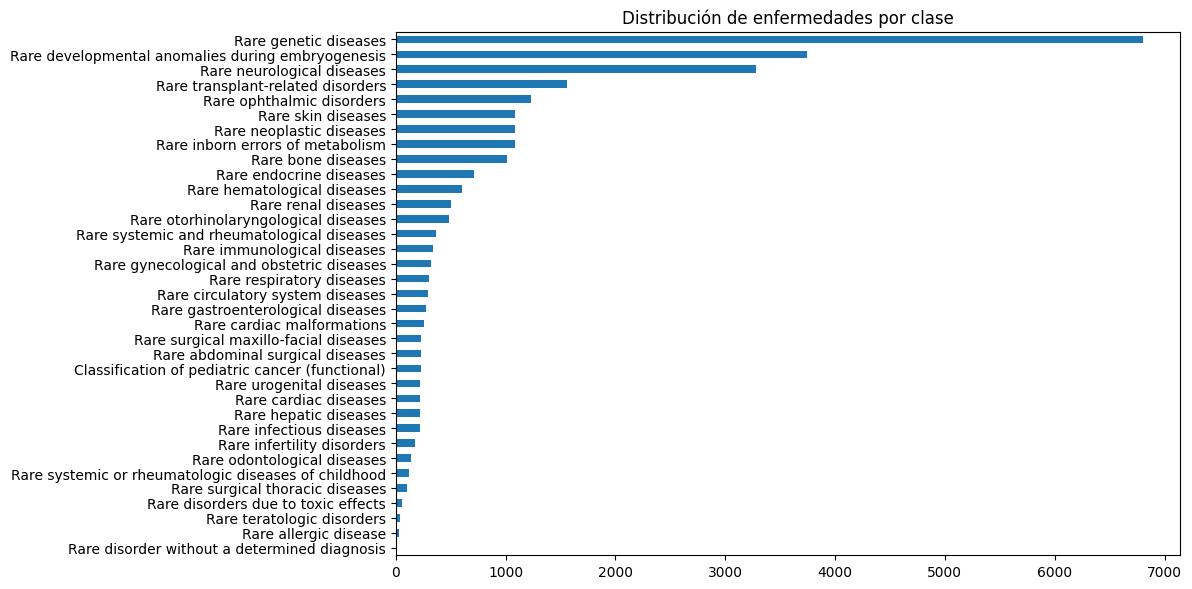

In [297]:
# Suponiendo que df es tu DataFrame original
conteo_clases = clasificacion.groupby("clase")["nombre_enfermedad"].count().sort_values()

# Graficar el pastel
conteo_clases.plot.barh(
    figsize=(12, 6),
    legend=False,
    title="Distribución de enfermedades por clase"
)

plt.ylabel("")  # Ocultar la etiqueta del eje y
plt.tight_layout()
plt.show()


In [ ]:
# Suponiendo que 'clasificacion' es tu DataFrame con 4 columnas
clasificaciones_agregadas = clasificacion.groupby('ORPHAcode')['clase'].apply(list).reset_index()

print(clasificaciones_agregadas.head())

   ORPHAcode                                              clase
0          5  [Orphanet classification of rare cardiac disea...
1          6  [Orphanet classification of rare inborn errors...
2          7  [Orphanet classification of rare developmental...
3          8  [Orphanet classification of rare developmental...
4          9  [Orphanet classification of rare developmental...


   ORPHAcode  cantidad_clasificaciones
0          5                         7
1          6                         2
2          7                         3
3          8                         2
4          9                         5


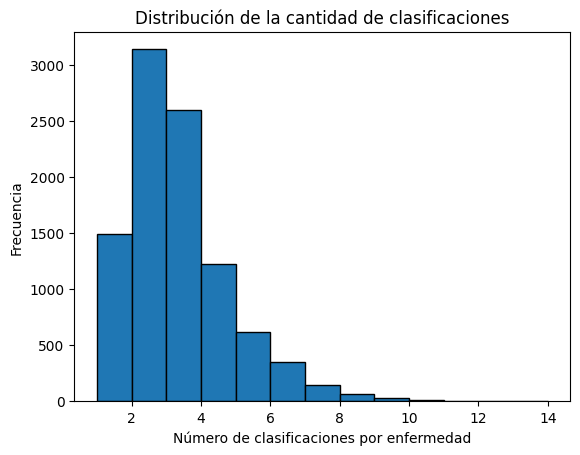

In [273]:
conteo_clasificacion = clasificacion.groupby('ORPHAcode').size().reset_index(name='cantidad_clasificaciones')

print(conteo_clasificacion.head())

# Opcional: Graficar la distribución del número de clasificaciones
import matplotlib.pyplot as plt

plt.hist(conteo_clasificacion['cantidad_clasificaciones'], bins=range(1, conteo_clasificacion['cantidad_clasificaciones'].max() + 1), edgecolor='black')
plt.xlabel('Número de clasificaciones por enfermedad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la cantidad de clasificaciones')
plt.show()
